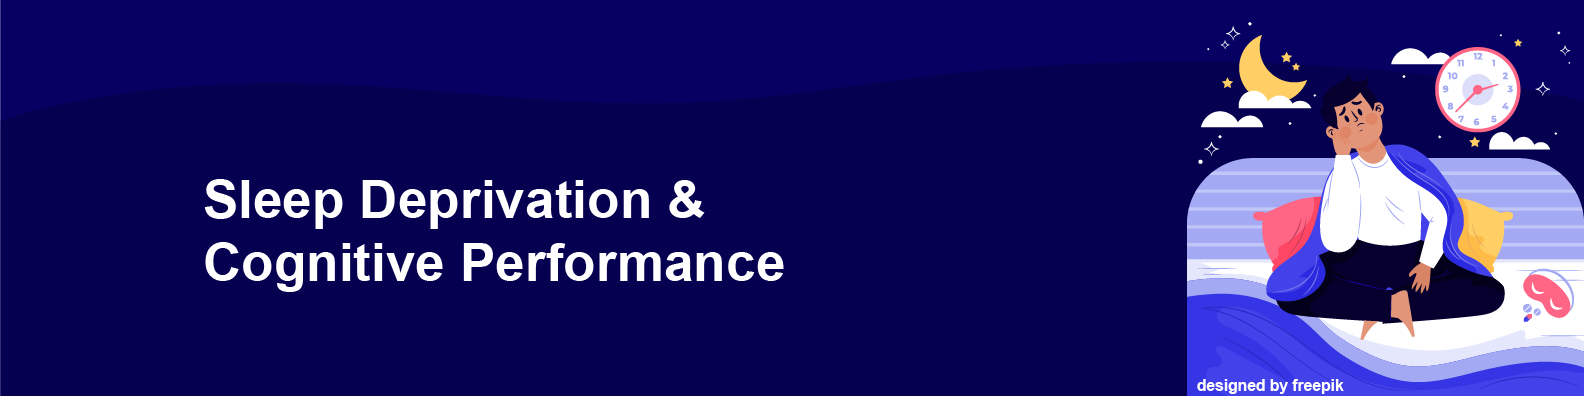

# **Introduction**

In this project, I undertake a comprehensive statistical analysis of a dataset sourced from Kaggle, aiming to extract meaningful insights and identify underlying patterns within the data. The analytical approach is structured as follows:

**Data Acquisition and Understanding:** The initial phase involves importing the dataset and conducting a thorough review of its structure. This includes examining the dimensions of the data, understanding the types of variables present, and assessing the completeness of the data by identifying any missing values.


**Exploratory Data Analysis (EDA)**: **EDA is performed to summarize the main characteristics of the data. This includes:**

**Descriptive Statistics:** Calculating measures such as mean, median, standard deviation, and range to understand the distribution of numerical variables.

**Data Visualization:** Creating visual representations like histograms, box plots, and scatter plots to identify trends, patterns, and potential outliers.

**Statistical Testing and Inference:** To validate hypotheses and draw conclusions, various statistical tests are applied, such as:

**Correlation Analysis:** Assessing the relationships between variables using Pearson or Spearman correlation coefficients.

**Comparative Tests:** Utilizing t-tests or non-parametric alternatives to compare groups within the data.

**Interpretation and Reporting:** The final step involves interpreting the results in the context of the original research questions, discussing the implications of the findings, and suggesting potential areas for further research.

This structured approach ensures a thorough and methodical analysis, facilitating the extraction of actionable insights from the dataset.

You can find the dataset in the link below.

https://www.kaggle.com/datasets/sacramentotechnology/sleep-deprivation-and-cognitive-performance

# **About Dataset**

This dataset explores the effects of sleep deprivation on cognitive performance and emotional regulation, based on a 2024 study conducted in the Middle East. It includes 60 participants from diverse backgrounds, capturing data on sleep duration, sleep quality, daytime sleepiness, cognitive function (reaction times, memory accuracy), and emotional stability. Additionally, it records demographic factors such as age, gender, BMI, and lifestyle influences like caffeine intake, physical activity levels, and stress levels.

The study was conducted using standardized cognitive performance tests, including the Stroop Task, N-Back Test, and Psychomotor Vigilance Task (PVT), commonly used in neuroscience and psychology research. This dataset is structured to support statistical analysis, machine learning applications, and behavioral research. It provides valuable insights for sleep research, mental health studies, and cognitive performance analysis, particularly in the context of Middle Eastern populations and lifestyle factors in 2024.

# **Packages and Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu


# **Initial Data Approach**

In [ ]:
sleep_df = pd.read_csv('/content/sleep_deprivation_dataset_detailed.csv')

In [ ]:
sleep_df.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [ ]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                60 non-null     float64
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        60 non-null     int64  
 9   Gender                     60 non-null     object 
 10  BMI                        60 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
d

In [ ]:
sleep_df.isnull().sum()

,0
Participant_ID,0
Sleep_Hours,0
Sleep_Quality_Score,0
Daytime_Sleepiness,0
Stroop_Task_Reaction_Time,0
N_Back_Accuracy,0
Emotion_Regulation_Score,0
PVT_Reaction_Time,0
Age,0
Gender,0


In [ ]:
sleep_df.duplicated().sum()

0

**The dataframe do not contains any missing or duplicated values.**

# **Univariate Analysis Approach for the Dataset**

Univariate analysis focuses on examining each variable individually to understand its distribution, central tendency, and variability. The following methods can be applied to each variable in the dataset:
Sleep and Cognitive Performance Variables

    

By performing this univariate analysis, we can gain insights into data distribution, identify potential outliers, and determine appropriate transformations or further statistical approaches.

## **Sleep Hours**

The total number of hours each participant sleeps per night, measured as a continuous variable. This represents the actual sleep duration and is a key factor in assessing the impact of sleep deprivation.

In [ ]:
sleep_df['Sleep_Hours'].describe()

,Sleep_Hours
count,60.000000
mean,5.805500
std,1.832357
min,3.120000
25%,4.107500
50%,5.690000
75%,7.285000
max,8.820000


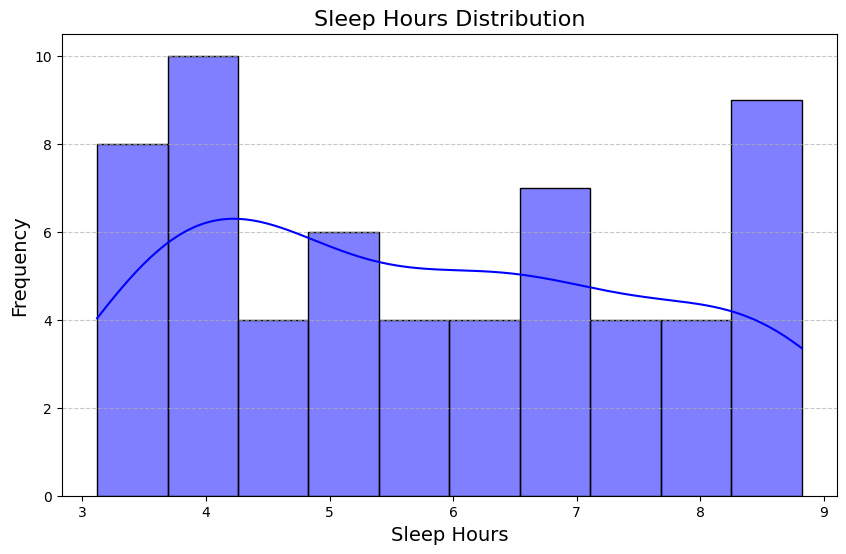

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['Sleep_Hours'], bins=10, kde=True, color='blue')

# Customization
plt.title('Sleep Hours Distribution', fontsize=16)
plt.xlabel('Sleep Hours', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Based on the summary statistics for the Sleep_Hours variable, we can draw the following conclusions:**

  **Average Sleep Duration**: The mean sleep duration is 5.81 hours, which suggests that, on average, participants sleep less than the recommended 7–9 hours for adults.

  **Sleep Variation**: The standard deviation of 1.83 hours indicates moderate variability in sleep duration among participants.

  **Range of Sleep Hours**: The minimum recorded sleep duration is 3.12 hours, while the maximum is 8.82 hours, showing a broad range of sleep habits in the sample.

  

  **Quartile Distribution:**

   **25th percentile (Q1)**: 4.11 hours – A quarter of the participants sleep less than 4.11 hours, indicating a significant portion experiences short sleep duration.

   **Median (Q2, 50%): 5.69 hours** – Half of the participants sleep 5.69 hours or less, reinforcing the prevalence of sleep deprivation.

  **75th percentile (Q3):** 7.29 hours – Only 25% of participants sleep more than 7.29 hours, suggesting that longer sleep durations are less common.


  Potential Sleep Deprivation: Since the median sleep duration is below 6 hours, many participants likely experience sleep deprivation, which could impact their cognitive performance and emotional regulation.

Overall, these insights suggest that most participants sleep less than the recommended amount, with a considerable proportion getting very short sleep durations (< 4 hours), potentially affecting their cognitive and emotional well-being.

## **Sleep Quality Score**

A numerical score reflecting the subjective quality of sleep, based on standardized sleep assessment tools. Higher scores indicate better sleep quality, while lower scores suggest disturbances or poor sleep.


In [ ]:
sleep_df['Sleep_Quality_Score'].describe()

,Sleep_Quality_Score
count,60.000000
mean,8.316667
std,5.637320
min,0.000000
25%,4.000000
50%,8.000000
75%,13.000000
max,20.000000


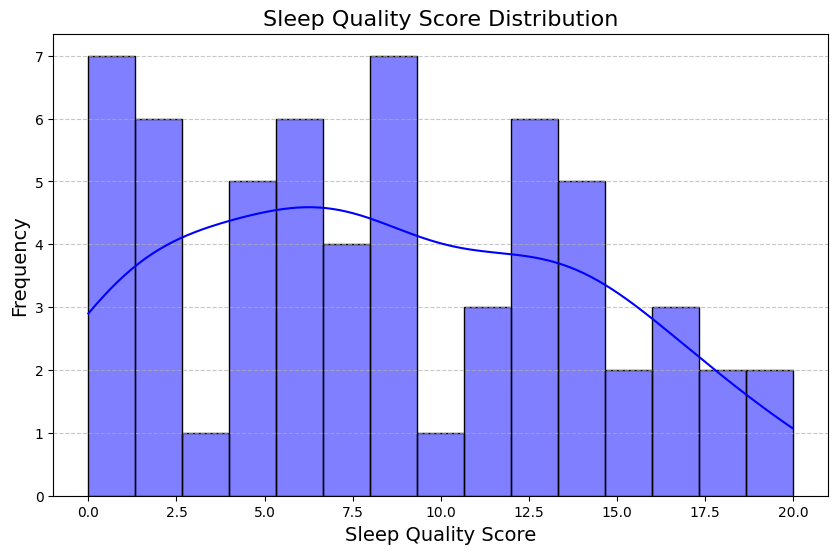

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['Sleep_Quality_Score'], bins=15, kde=True, color='blue')

# Customization
plt.title('Sleep Quality Score Distribution', fontsize=16)
plt.xlabel('Sleep Quality Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Based on the summary statistics for the Sleep_Quality_Score variable, we can draw the following conclusions:**

**Average Sleep Quality**

The mean Sleep_Quality_Score is 8.32, indicating a moderate overall sleep quality among participants.

High Variability: The standard deviation of 5.64 suggests a wide variation in sleep quality across the sample, meaning some participants experience very poor sleep while others report much better quality.

**Range of Sleep Quality Scores:**

**The minimum score is 0**, suggesting that at least one participant reported extremely poor sleep quality.

**The maximum score is 20**, indicating that some participants experience very good sleep quality.

**Quartile Distribution:**

**25th percentile (Q1):** 4.00 – A quarter of participants have a sleep quality score of 4 or lower, suggesting a significant group struggles with poor sleep.

**Median (Q2, 50%):** 8.00 – Half of the participants report a sleep quality score of 8 or lower, reinforcing that moderate-to-poor sleep quality is common.

**75th percentile (Q3):** 13.00 – The upper quartile shows that 25% of participants have a sleep quality score above 13, indicating that a smaller portion experiences notably better sleep.

Potential Sleep Issues: Since 50% of participants score 8 or lower, a significant portion may struggle with suboptimal sleep quality, which could contribute to cognitive and emotional difficulties. The wide range (0 to 20) also suggests large individual differences in perceived sleep quality.

## **Daytime Sleepiness**

A self-reported measure of excessive sleepiness during the day, often assessed using standardized scales like the Epworth Sleepiness Scale. Higher values indicate greater levels of daytime drowsiness, which may affect cognitive and emotional functioning.


In [ ]:
sleep_df['Daytime_Sleepiness'].describe()

,Daytime_Sleepiness
count,60.000000
mean,12.000000
std,7.577845
min,0.000000
25%,6.000000
50%,11.500000
75%,19.000000
max,24.000000


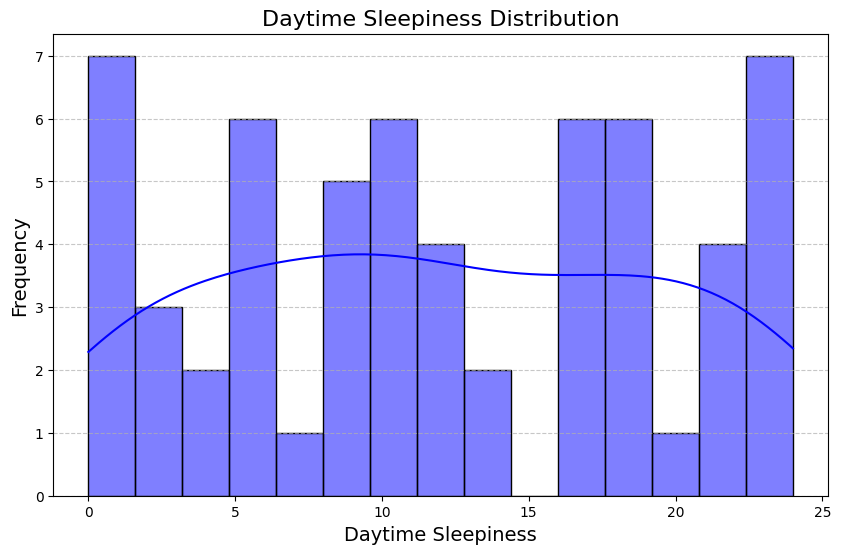

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['Daytime_Sleepiness'], bins=15, kde=True, color='blue')

# Customization
plt.title('Daytime Sleepiness Distribution', fontsize=16)
plt.xlabel('Daytime Sleepiness', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Based on the summary statistics for the Daytime_Sleepiness_Score variable, we can draw the following conclusions:**

Average Daytime Sleepiness: The mean Daytime_Sleepiness_Score is 12.00, suggesting that, on average, participants experience a moderate level of daytime sleepiness.


**High Variability**: The standard deviation of 7.58 indicates a wide variation in daytime sleepiness across participants, meaning some individuals experience very little sleepiness while others struggle with extreme levels.


**Range of Sleepiness Scores:**

**The minimum score** is 0, indicating that at least one participant experiences no daytime sleepiness.

**The maximum score** is 24, suggesting that some participants suffer from severe daytime sleepiness, which could negatively impact their cognitive performance and daily activities.

**Quartile Distribution:**

**25th percentile (Q1)**: 6.00 – A quarter of participants report a daytime sleepiness score of 6 or lower, indicating a group with relatively low sleepiness levels.


**Median (Q2, 50%):** 11.50 – Half of the participants have a score of 11.5 or lower, reinforcing that a moderate level of sleepiness is common.
        
**75th percentile (Q3):** 19.00 – The upper quartile shows that 25% of participants have a daytime sleepiness score above 19, indicating a significant portion experiences high levels of sleepiness.

Potential Sleep Deficiency: Since a considerable portion of participants has high daytime sleepiness scores, this may indicate poor sleep quality, insufficient sleep duration, or other lifestyle factors (e.g., stress, caffeine intake, or physical activity levels) affecting their alertness.

## **Stroop Task Reaction Time**

The response time (in seconds) recorded during the Stroop Task, a widely used cognitive test assessing attentional control, processing speed, and the ability to manage cognitive interference. Longer reaction times suggest impaired cognitive flexibility due to sleep deprivation.

In [ ]:
sleep_df['Stroop_Task_Reaction_Time'].describe()

,Stroop_Task_Reaction_Time
count,60.000000
mean,3.245000
std,0.827368
min,1.600000
25%,2.595000
50%,3.260000
75%,3.965000
max,4.490000


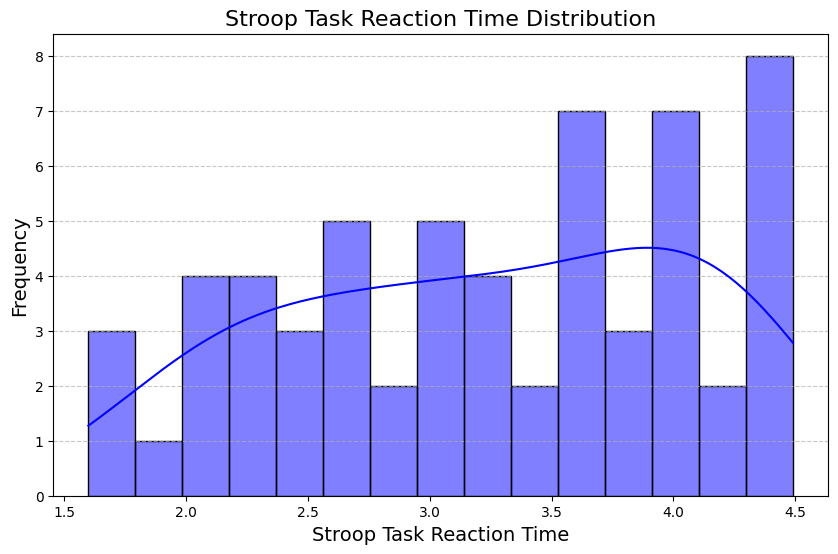

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['Stroop_Task_Reaction_Time'], bins=15, kde=True, color='blue')

# Customization
plt.title('Stroop Task Reaction Time Distribution', fontsize=16)
plt.xlabel('Stroop Task Reaction Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Based on the summary statistics for the Stroop_Task_Reaction_Time variable, we can draw the following conclusions:**

**Average Reaction Time**: The mean Stroop_Task_Reaction_Time is 3.25 seconds, indicating the average time participants took to complete the task.

**Moderate Variability:** The standard deviation of 0.83 seconds suggests some variation in reaction times among participants, but the differences are not extreme.


**Reaction Time Range:**

**The minimum recorded reaction time is 1.60 seconds**, indicating that the fastest participant completed the task significantly quicker than the average.

**The maximum reaction time is 4.49 seconds**, showing that the slowest participant took almost three times longer than the fastest one.


**Quartile Distribution:**

**25th percentile (Q1)**: 2.60 seconds – A quarter of participants completed the task in 2.60 seconds or less, indicating faster cognitive processing in this group.

**Median (Q2, 50%):** 3.26 seconds – Half of the participants completed the task in 3.26 seconds or less, meaning this is a representative benchmark for cognitive performance in the group.

**75th percentile (Q3):** 3.97 seconds – The slowest 25% of participants took 3.97 seconds or more, suggesting they may have experienced cognitive delays or difficulty with task interference.

**Cognitive Performance Insights:**

- Participants with faster reaction times (< 2.60s, Q1) may have higher cognitive flexibility and better attention control.

- Participants with slower reaction times (> 3.97s, Q3) may be experiencing slower cognitive processing, possibly influenced by factors such as sleep deprivation, stress, or fatigue.

## **N Back Accuracy**
The percentage of correct responses in the N-Back Test, a cognitive task used to measure working memory performance. Higher accuracy reflects better memory retention and cognitive function, which may be affected by sleep duration and quality.


In [ ]:
sleep_df['N_Back_Accuracy'].describe()

,N_Back_Accuracy
count,60.000000
mean,75.005833
std,13.671457
min,50.900000
25%,64.620000
50%,74.270000
75%,85.600000
max,99.730000


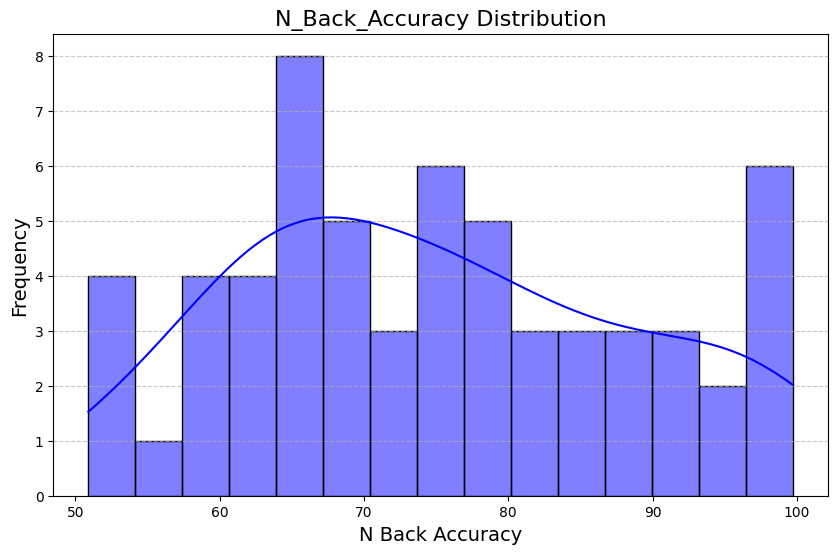

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['N_Back_Accuracy'], bins=15, kde=True, color='blue')

# Customization
plt.title('N_Back_Accuracy Distribution', fontsize=16)
plt.xlabel('N Back Accuracy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Based on the summary statistics for the N_Back_Accuracy variable, we can draw the following conclusions:**

**Average Accuracy:** The mean N_Back_Accuracy is 75.01%, indicating that, on average, participants correctly identified targets in about three-fourths of the trials, suggesting moderate to high working memory performance.

**Moderate Variability:** The standard deviation of 13.67% suggests a moderate spread in accuracy scores, meaning that while some participants performed significantly better, others had lower accuracy.

**Accuracy Range:**
**The minimum accuracy recorded is 50.90%**, meaning the lowest-performing participant still performed above chance level (which is typically 50% in a two-choice task).

**The maximum accuracy is 99.73%,** indicating that the best-performing participant had near-perfect working memory performance.

**Quartile Distribution:**
**25th percentile (Q1): 64.62%** – The lowest 25% of participants had an accuracy of 64.62% or lower, suggesting weaker working memory performance in this subgroup.

**Median (Q2, 50%): 74.27%** – Half of the participants scored 74.27% or below, making this a benchmark for average working memory ability in the dataset.

**75th percentile (Q3): 85.60%** – The top 25% of participants had an accuracy above 85.60%, indicating a group with strong working memory capabilities.

**Cognitive Performance Insights:**
Participants scoring above 85.60% (Q3) likely have strong working memory and attentional control, potentially benefiting from better sleep quality, lower stress, or higher cognitive capacity.
Participants scoring below 64.62% (Q1) might struggle with working memory performance, which could be influenced by poor sleep, high stress levels, or other lifestyle factors.

## **Emotion Regulation Score**

 A numerical score assessing an individual's ability to regulate emotions effectively. This is typically measured using psychological scales, where higher scores indicate better emotional regulation, and lower scores suggest difficulties in managing emotions.

In [ ]:
sleep_df['Emotion_Regulation_Score'].describe()

,Emotion_Regulation_Score
count,60.0000
mean,38.1500
std,17.1334
min,10.0000
25%,25.0000
50%,37.0000
75%,54.2500
max,67.0000


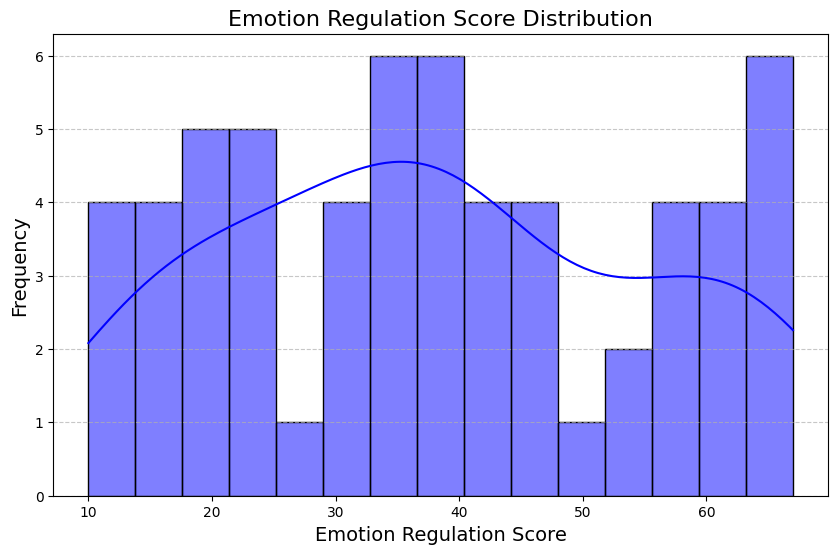

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['Emotion_Regulation_Score'], bins=15, kde=True, color='blue')

# Customization
plt.title('Emotion Regulation Score Distribution', fontsize=16)
plt.xlabel('Emotion Regulation Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Based on the summary statistics for the Emotion_Regulation_Score variable, we can draw the following conclusions:**

**Average Emotional Regulation:** The mean Emotion_Regulation_Score is 38.15, indicating the typical emotional regulation ability in this group.

**High Variability:** The standard deviation of 17.13 suggests a wide spread in scores, meaning that some participants have significantly better or worse emotional regulation compared to the average.

**Score Range:**
**The minimum recorded score is 10.00**, indicating that some participants struggle considerably with emotional regulation.

**The maximum recorded score is 67.00**, meaning some participants exhibit strong emotional control and regulation skills.

**Quartile Distribution:**
**25th percentile (Q1): 25.00** – The lowest 25% of participants have scores at or below 25, suggesting weaker emotional regulation in this group.

**Median (Q2, 50%): 37.00** – Half of the participants have scores below or equal to 37, making this a reference point for emotional regulation ability in the dataset.

**75th percentile (Q3): 54.25** – The highest 25% of participants score above 54.25, indicating stronger emotional regulation skills.

**Emotional Regulation Insights:**

Participants scoring above 54.25 (Q3) may have better coping mechanisms for stress, emotional control, and resilience, which could be associated with better sleep quality, lower stress levels, or higher physical activity.
Participants scoring below 25.00 (Q1) may struggle with managing emotions, handling stress, or maintaining emotional stability, potentially influenced by poor sleep, high caffeine intake, or elevated stress levels.

## **PVT Reaction Time**

The reaction time (in milliseconds) recorded during the Psychomotor Vigilance Task (PVT), which evaluates sustained attention and alertness. Increased reaction times or more lapses in response indicate higher levels of cognitive fatigue due to sleep deprivation.

In [ ]:
sleep_df['PVT_Reaction_Time'].describe()

,PVT_Reaction_Time
count,60.000000
mean,332.539000
std,87.800288
min,201.560000
25%,257.535000
50%,327.210000
75%,402.845000
max,494.550000


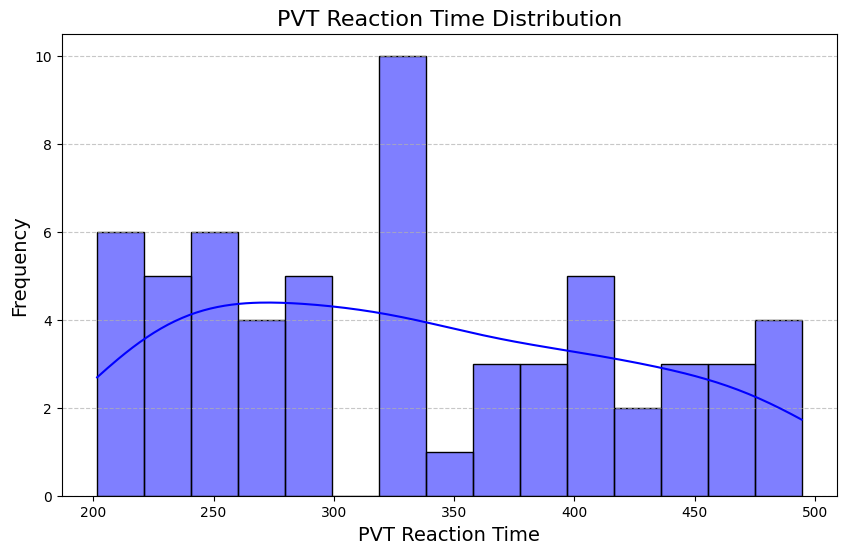

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['PVT_Reaction_Time'], bins=15, kde=True, color='blue')

# Customization
plt.title('PVT Reaction Time Distribution', fontsize=16)
plt.xlabel('PVT Reaction Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 **Analysis of PVT_Reaction_Time**

The Psychomotor Vigilance Task (PVT) Reaction Time measures alertness and sustained attention, which are often affected by sleep deprivation. Based on the summary statistics, we can derive the following insights:

**Average Reaction Time:** The mean PVT reaction time is 332.54 ms, indicating the typical cognitive response speed in this group.

**High Variability:** The standard deviation of 87.80 ms suggests significant variation among participants, meaning some react much faster while others show delayed responses.

**Reaction Time Range:**
**Minimum (Fastest Reaction Time): 201.56 ms,** indicating some participants exhibit strong alertness and quick responses.

**Maximum (Slowest Reaction Time): 494.55 ms**, suggesting some participants experience delayed reactions, potentially due to fatigue, sleep deprivation, or other cognitive impairments.

**Quartile Distribution:**
**25th percentile (Q1): 257.54 ms** – The fastest 25% of participants respond in 257.54 ms or less, showing high cognitive efficiency and attentiveness.

**Median (Q2, 50%): 327.21 ms** – Half of the participants have reaction times below or equal to 327.21 ms, making it the central reference point for performance.

**75th percentile (Q3): 402.85 ms** – The slowest 25% of participants have reaction times above 402.85 ms, indicating reduced alertness or impaired vigilance.

**Cognitive Performance Insights:**
Participants with fast reaction times (below Q1) likely experience better cognitive alertness, possibly due to sufficient sleep, lower stress, or good sleep quality.
Participants with slow reaction times (above Q3) may struggle with cognitive fatigue, slower processing speed, or higher daytime sleepiness, which could be linked to sleep deprivation, high stress levels, or other lifestyle factors.

# **Demographic and Lifestyle Factors**

## **Age**

The participant’s age, measured in years. Age can influence sleep patterns, cognitive function, and emotional regulation.


In [ ]:
sleep_df['Age'].describe()

,Age
count,60.000000
mean,29.516667
std,8.168753
min,18.000000
25%,21.750000
50%,28.500000
75%,36.000000
max,43.000000


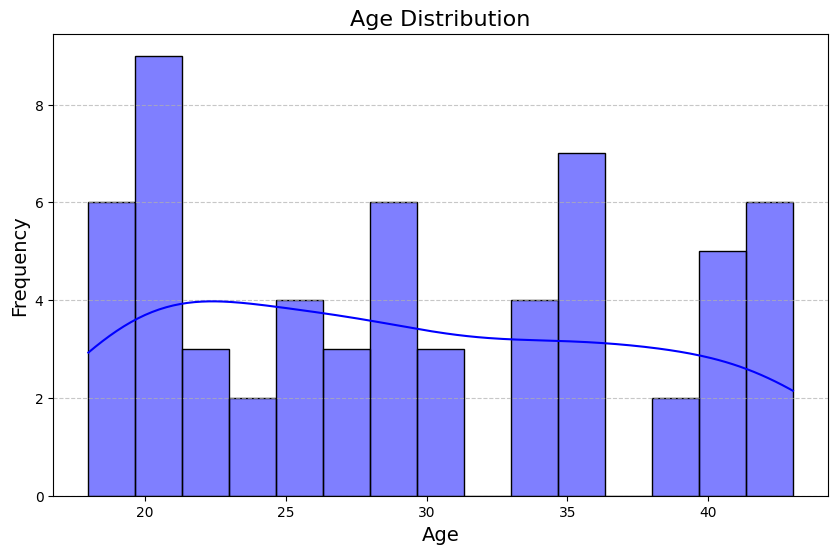

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['Age'], bins=15, kde=True, color='blue')

# Customization
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis of Age Distribution**

The dataset contains 60 participants with the following age-related insights:

**Average Age**: The mean age is 29.52 years, indicating that the majority of participants are young adults.

**Age Range:**
**Youngest Participant: 18 years old**, suggesting the dataset includes individuals who are legally adults.

**Oldest Participant: 43 years old**, meaning the study covers a broad range of adulthood but does not include elderly individuals.

**Quartile Distribution:**
**25th percentile (Q1): 21.75 years** – 25% of participants are younger than 21.75 years, making up the youngest group.

**Median (Q2, 50%): 28.5 years** – Half of the participants are younger than 28.5 years, making this a central reference for the age distribution.

**75th percentile (Q3): 36 years** – 25% of participants are older than 36 years, representing the upper age group in this study.

**Age Variability:** The standard deviation (8.17 years) indicates a moderate spread in ages, meaning participants come from different age groups but are not extremely diverse in terms of generational differences.

## **Gender**

The participant’s self-identified gender (e.g., male, female, or other). Gender differences may influence sleep patterns, cognitive performance, and emotional stability.


In [ ]:
sleep_df['Gender'].value_counts()

,count
Gender,
Male,37
Female,23


In [ ]:
# Data provided
gender_counts = sleep_df['Gender'].value_counts()

# Total occurrences
total = gender_counts.sum()

# Calculating the proportion in percentage
gender_proportions = (gender_counts / total) * 100

# Displaying results with 2 decimal places
print(gender_proportions.round(2))

Gender
Male      61.67
Female    38.33
Name: count, dtype: float64


<ipython-input-25-c9f6298c5620>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x='Gender', y='Count', palette='Blues_d')


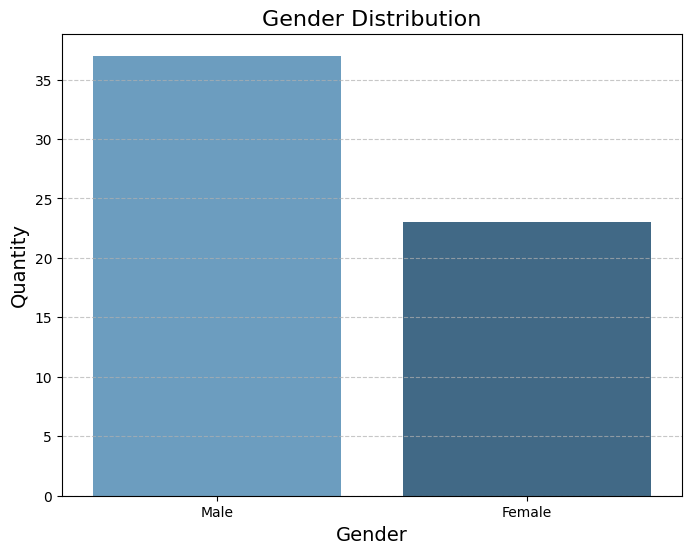

In [ ]:
# Contagem de valores
gender_counts = sleep_df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_counts, x='Gender', y='Count', palette='Blues_d')

# Personalização
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Gender Distribution Analysis**

The dataset consists of 60 participants, distributed by gender as follows:

**Male**: 37 participants (61.67%)
**Female**: 23 participants (38.33%)

**Key Observations:**

**Male** participants are the majority, making up nearly two-thirds of the dataset.

**Female** participants represent a smaller proportion, accounting for just over one-third of the total sample.

The gender imbalance in the dataset should be considered when analyzing variables such as cognitive performance, sleep patterns, and emotional regulation, as gender differences may influence these outcomes.

## **BMI:**

Body Mass Index, calculated using weight and height measurements. This variable helps assess the participant’s overall physical health and its potential impact on sleep quality and cognitive performance.


In [ ]:
sleep_df['BMI'].describe()

,BMI
count,60.000000
mean,27.329333
std,4.541382
min,18.740000
25%,23.580000
50%,27.365000
75%,30.747500
max,34.930000


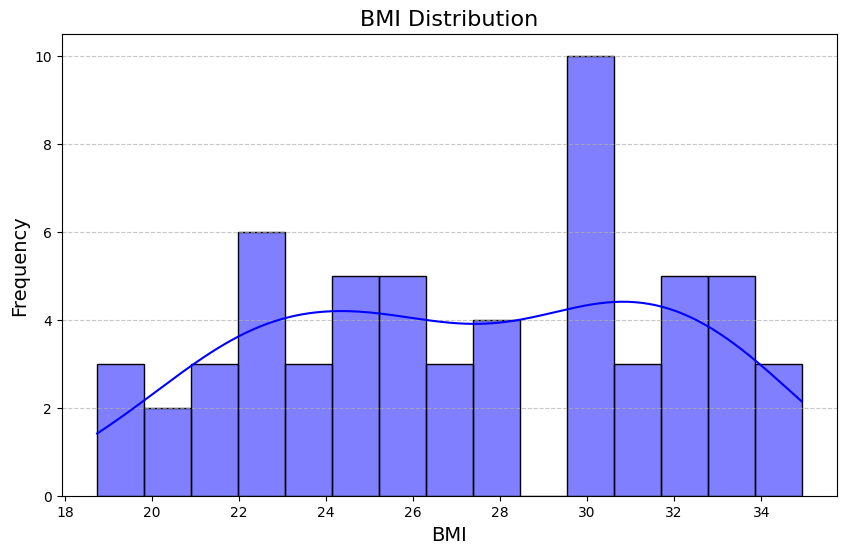

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['BMI'], bins=15, kde=True, color='blue')

# Customization
plt.title('BMI Distribution', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis of BMI Distribution**

The dataset contains 60 participants, and their Body Mass Index (BMI) is distributed as follows:

**Average BMI:** The mean BMI is 27.33, which falls in the overweight category (BMI 25–29.9). This suggests that, on average, participants have a BMI above the normal range.

**BMI Range:**
**Minimum BMI: 18.74**, indicating at least one participant is at the lower end of the normal weight range (BMI 18.5–24.9).

**Maximum BMI: 34.93**, which falls in the obese category (BMI 30 and above).

**Quartile Distribution:**

**25th percentile (Q1): 23.58** – 25% of participants have a BMI below 23.58, suggesting some individuals fall in the normal weight range.

**Median (Q2, 50%): 27.37** – The middle value aligns closely with the mean, reinforcing that the majority are in the overweight category.

**75th percentile (Q3):** 30.75 – 25% of participants have a BMI above 30.75, placing them in the obese category.

**BMI Variability:** The standard deviation of 4.54 shows a moderate spread in BMI values, indicating some variation but no extreme outliers.

##**Caffeine Intake:**

The daily caffeine consumption, measured in standard units (e.g., milligrams of caffeine or number of cups of coffee). Higher caffeine intake can influence sleep quality, alertness, and cognitive performance.

In [ ]:
sleep_df['Caffeine_Intake'].describe()

,Caffeine_Intake
count,60.000000
mean,2.383333
std,1.688362
min,0.000000
25%,1.000000
50%,2.500000
75%,4.000000
max,5.000000


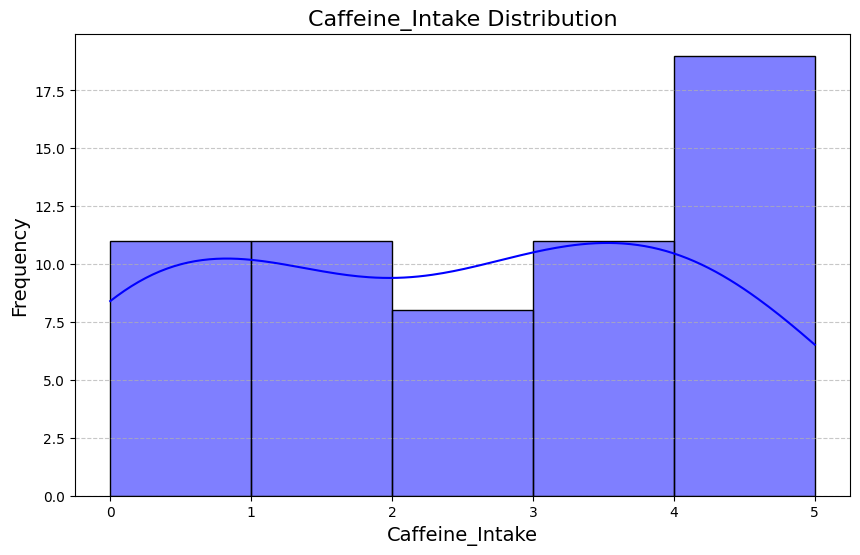

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['Caffeine_Intake'], bins=5, kde=True, color='blue')

# Customization
plt.title('Caffeine_Intake Distribution', fontsize=16)
plt.xlabel('Caffeine_Intake', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Analysis of Caffeine Intake**

The dataset includes 60 participants, and their daily caffeine intake (measured in number of servings per day) is distributed as follows:

**Average Consumption:**
The mean caffeine intake is 2.38 servings per day, suggesting a moderate level of caffeine consumption among participants.

**Consumption Range:**
**Minimum intake: 0 servings**, indicating some participants do not consume caffeine at all.
**Maximum intake: 5 servings,** showing that some individuals have a high caffeine consumption level.

**Quartile Distribution:**
**25th percentile (Q1): 1 serving** – 25% of participants consume 1 or fewer servings per day.

**Median (Q2, 50%): 2.5 servings** – Half of the participants consume 2.5 servings or less per day.

**75th percentile (Q3): 4 servings** – 25% of participants consume 4 or more servings per day.

**Variability in Caffeine Intake:**
The standard deviation of 1.69 suggests moderate variation in caffeine consumption, with most values falling within a reasonable range.
There is a wide distribution, with some participants consuming no caffeine while others consume high amounts.

## **Physical Activity Level:**

A numerical representation of the participant's level of physical activity, often categorized as sedentary, moderate, or active. Regular physical activity can positively impact sleep quality and cognitive function.

In [ ]:
sleep_df['Physical_Activity_Level'].describe()

,Physical_Activity_Level
count,60.000000
mean,4.116667
std,3.108717
min,0.000000
25%,1.000000
50%,4.000000
75%,6.000000
max,10.000000


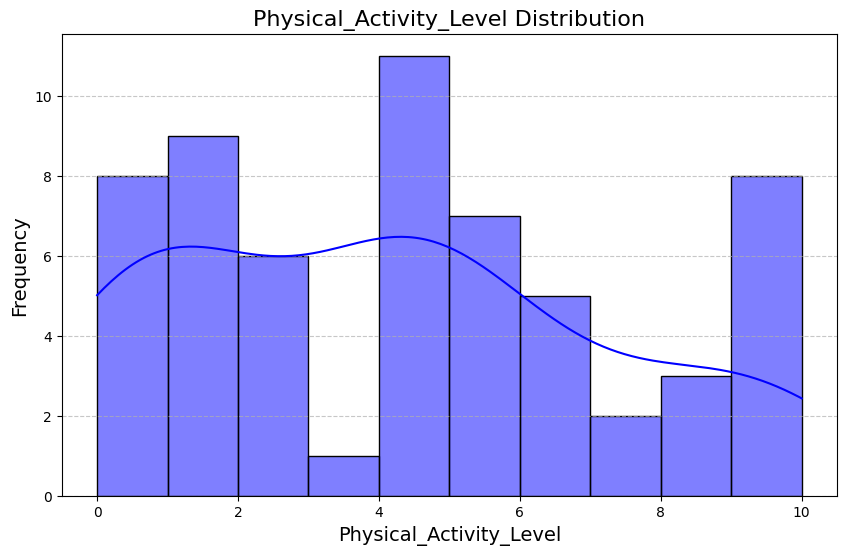

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['Physical_Activity_Level'], bins=10, kde=True, color='blue')

# Customization
plt.title('Physical_Activity_Level Distribution', fontsize=16)
plt.xlabel('Physical_Activity_Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis of Physical Activity Level**

The dataset records physical activity levels for 60 participants, measured on a scale from 0 (no activity) to 10 (high activity). The distribution provides key insights into participants' activity patterns:

**Average Physical Activity:**
The mean activity level is 4.12, indicating a moderate level of physical activity on average.

**Activity Level Range:**
**Minimum value: 0**, meaning some participants engage in no physical activity.

**Maximum value: 10**, showing that some participants maintain a very high level of physical activity.

**Quartile Distribution:**
**25th percentile (Q1):** 1.0 – 25% of participants engage in minimal activity.

**Median (Q2, 50%): 4.0 **– Half of the participants engage in moderate physical activity or less.

**75th percentile (Q3): 6.0** – 25% of participants have a high level of physical activity (6 or more).

**Variability in Physical Activity:**
The standard deviation of 3.11 suggests a high level of variation in activity levels among participants.
Some individuals lead a sedentary lifestyle (0–1 activity level), while others engage in regular and intense physical exercise (6–10 activity level).

## **Stress Level**

A score measuring the participant’s perceived stress, based on standardized psychological scales. Higher scores indicate higher stress levels, which may negatively affect sleep quality, emotional regulation, and cognitive performance.


In [ ]:
sleep_df['Stress_Level'].describe()

,Stress_Level
count,60.000000
mean,17.866667
std,11.015346
min,0.000000
25%,8.750000
50%,17.500000
75%,26.250000
max,40.000000


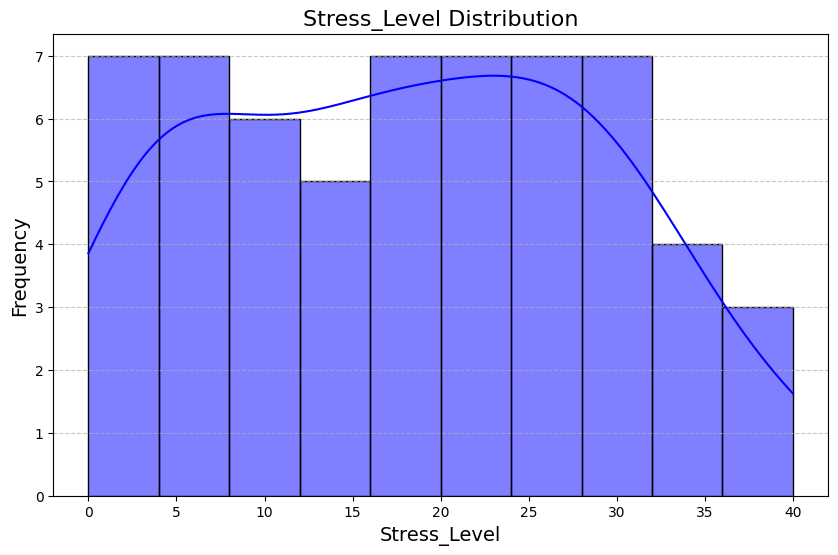

In [ ]:
# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['Stress_Level'], bins=10, kde=True, color='blue')

# Customization
plt.title('Stress_Level Distribution', fontsize=16)
plt.xlabel('Stress_Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis of Stress Levels**

The dataset measures stress levels for 60 participants, with scores ranging from 0 (no stress) to 40 (high stress). The distribution reveals the following insights:

**Average Stress Level:**
**The mean stress level is 17.87**, suggesting a moderate overall stress level among participants.

**Stress Level Range:**
**Minimum value: 0**, indicating some individuals report no stress at all.

**Maximum value: 40**, showing that some participants experience extremely high stress.

**Quartile Distribution:**
**25th percentile (Q1): 8.75** – 25% of participants experience relatively low stress (below 8.75).

**Median (Q2, 50%): 17.5**– Half of the participants report stress levels of 17.5 or lower.

**75th percentile (Q3): 26.25** – The top 25% of participants experience high stress (above 26.25).

**Variability in Stress Levels:**
A standard deviation of 11.02 suggests a wide variation in stress levels among participants.
Some participants have very low stress, while others experience intense stress, possibly impacting sleep quality, cognitive function, and emotional regulation.

# **Bivariate analysis of quantitative variables**

**The Importance of Bivariate Analysis**

Bivariate analysis is a crucial step in data exploration, as it helps uncover relationships between two variables, providing deeper insights into patterns and dependencies within a dataset. Unlike univariate analysis, which examines each variable individually, bivariate analysis allows researchers to assess correlations, trends, and potential causations.

This type of analysis is essential for identifying associations between independent and dependent variables, detecting possible confounding factors, and verifying hypotheses. For example, in sleep research, analyzing the relationship between **sleep duration** and **cognitive performance** can reveal whether sleep deprivation impacts reaction times or memory accuracy. Similarly, studying the link between **stress levels** and **emotional regulation** can provide insights into mental well-being.

Bivariate analysis is commonly performed using statistical techniques such as correlation analysis, t-tests, ANOVA, and regression models, depending on the nature of the variables (qualitative or quantitative). Additionally, visualization tools like scatter plots, box plots, and bar charts help interpret the relationships more effectively.

By conducting bivariate analysis, researchers can make data-driven decisions, validate theoretical assumptions, and set the foundation for more complex multivariate analyses. In behavioral and cognitive science, it plays a vital role in understanding how lifestyle factors, demographics, and psychological variables interact with one another.

## **Do more hours of sleeping improve sleep quality?**

In this analysis, I will examine the relationship between **Sleep Hours** and **Sleep Quality Score** to determine if longer sleep duration is associated with better sleep quality. This will involve conducting a **bivariate analysis**, using statistical methods such as correlation analysis and visualizations like scatter plots to assess the strength and direction of the relationship. If a positive correlation is found, it would suggest that increased sleep duration leads to better sleep quality. Conversely, a weak or negative correlation may indicate that other factors influence sleep quality beyond just sleep duration.

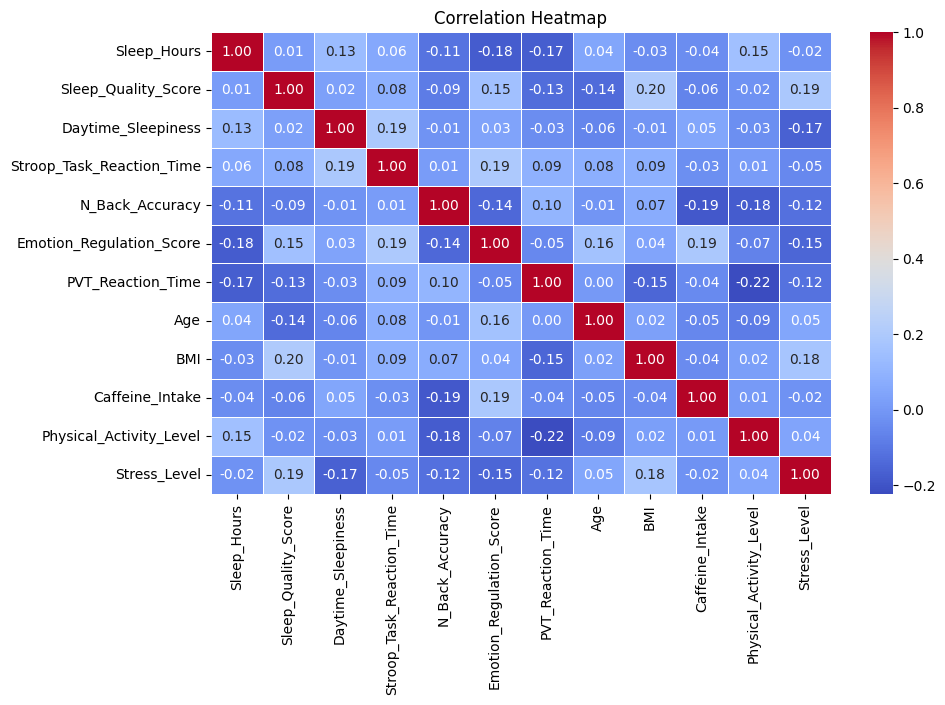

In [ ]:
numeric_df = sleep_df.select_dtypes(include=['number'])

# Criando o heatmap de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

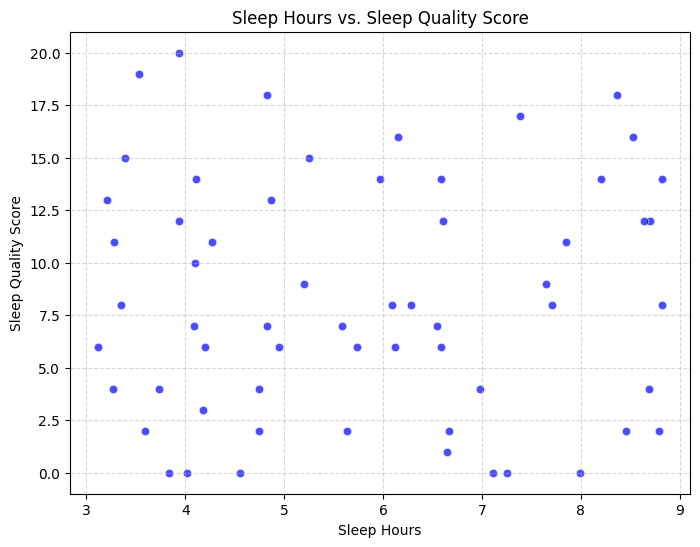

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sleep_df['Sleep_Hours'], y=sleep_df['Sleep_Quality_Score'], color='blue', alpha=0.7)
plt.title('Sleep Hours vs. Sleep Quality Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Sleep Quality Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
pearson_corr, pearson_p = pearsonr(sleep_df["Sleep_Hours"], sleep_df["Sleep_Quality_Score"])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")

# Calculando a correlação de Spearman
spearman_corr, spearman_p = spearmanr(sleep_df["Sleep_Hours"], sleep_df["Sleep_Quality_Score"])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")

Pearson Correlation: 0.01, p-value: 0.9160
Spearman Correlation: 0.02, p-value: 0.8984


**Pearson Correlation** (0.01, p = 0.9160) suggests that there is almost no linear relationship between the two variables. The high p-value (> 0.05) indicates that this correlation is not statistically significant.

**Spearman Correlation** (0.02, p = 0.8984) also shows no meaningful monotonic relationship between Sleep Hours and Sleep Quality Score. The p-value is very high, meaning the correlation is not significant.

## **Less Sleep, More Daytime Sleepiness**

In this analysis, I will investigate the relationship between Sleep Hours and Daytime Sleepiness to determine whether reduced sleep duration is associated with increased daytime drowsiness. I will use Pearson and Spearman correlation tests to measure the strength and direction of this relationship. Additionally, a scatter plot will be used to visualize any patterns or trends, helping to assess how strongly sleep duration influences daytime sleepiness levels.

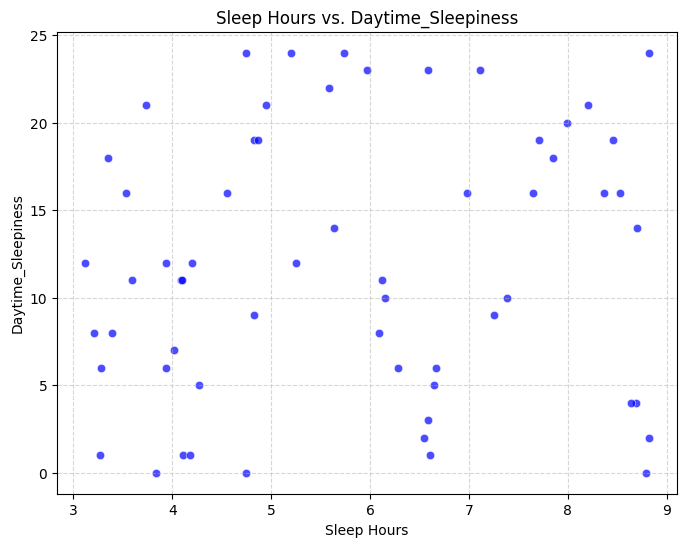

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sleep_df['Sleep_Hours'], y=sleep_df['Daytime_Sleepiness'], color='blue', alpha=0.7)
plt.title('Sleep Hours vs. Daytime_Sleepiness')
plt.xlabel('Sleep Hours')
plt.ylabel('Daytime_Sleepiness')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
pearson_corr, pearson_p = pearsonr(sleep_df["Sleep_Hours"], sleep_df["Daytime_Sleepiness"])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")

# Calculando a correlação de Spearman
spearman_corr, spearman_p = spearmanr(sleep_df["Sleep_Hours"], sleep_df["Daytime_Sleepiness"])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")

Pearson Correlation: 0.13, p-value: 0.3153
Spearman Correlation: 0.13, p-value: 0.3245


## **The correlation analysis between Sleep Hours and Daytime Sleepiness yielded the following results:**

    Pearson Correlation: 0.13 (p-value: 0.3153)
    Spearman Correlation: 0.13 (p-value: 0.3245)

These results suggest a very weak positive correlation between sleep duration and daytime sleepiness. However, the p-values are greater than 0.05, indicating that the relationship is not statistically significant.
Conclusion:

There is no strong evidence to support a meaningful association between the number of hours slept and reported daytime sleepiness levels. This suggests that other factors, such as sleep quality, stress, or individual differences, may play a more significant role in determining daytime drowsiness.

## **Does Stress Reduce Emotional Regulation?**

In this analysis, we will examine whether higher stress levels are associated with lower emotional regulation abilities. To do this, we will compute the Pearson and Spearman correlations between Stress Level and Emotion Regulation Score. Additionally, we will visualize the relationship using a scatter plot to observe potential patterns or trends.

If a negative correlation is found, it would suggest that individuals with higher stress levels tend to have more difficulty regulating their emotions. Conversely, if no significant correlation is detected, it may indicate that stress alone is not a strong predictor of emotional regulation.

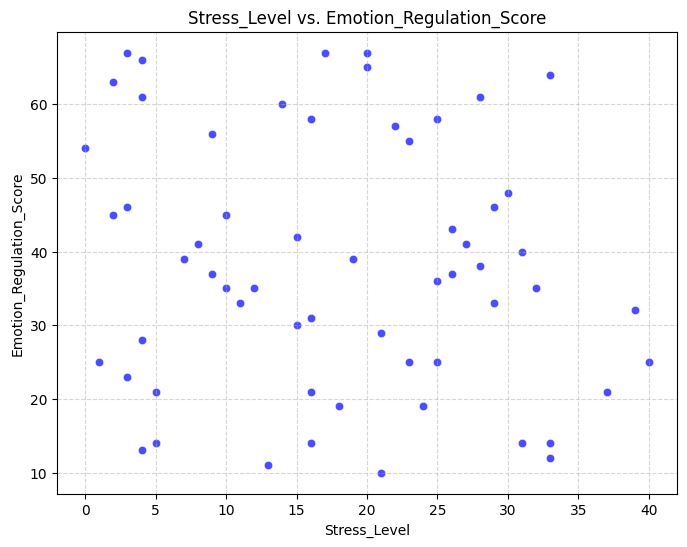

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sleep_df['Stress_Level'], y=sleep_df['Emotion_Regulation_Score'], color='blue', alpha=0.7)
plt.title('Stress_Level vs. Emotion_Regulation_Score')
plt.xlabel('Stress_Level')
plt.ylabel('Emotion_Regulation_Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
pearson_corr, pearson_p = pearsonr(sleep_df["Stress_Level"], sleep_df["Emotion_Regulation_Score"])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")

# Calculando a correlação de Spearman
spearman_corr, spearman_p = spearmanr(sleep_df["Stress_Level"], sleep_df["Emotion_Regulation_Score"])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")

Pearson Correlation: -0.15, p-value: 0.2592
Spearman Correlation: -0.14, p-value: 0.2776


## **The correlation analysis between Stress Level and Emotion Regulation Score yielded the following results:**

    Pearson Correlation: -0.15, p-value: 0.2592
    Spearman Correlation: -0.14, p-value: 0.2776

**Interpretation:**

**Weak Negative Correlation:** The Pearson and Spearman correlation coefficients are both slightly negative (-0.15 and -0.14), suggesting a weak inverse relationship between stress levels and emotional regulation. This means that, in general, individuals with higher stress levels may have slightly lower emotional regulation abilities, but the effect is very small.

**Statistical Insignificance:** The p-values (0.2592 and 0.2776) are much higher than the typical significance threshold of 0.05, indicating that this correlation is not statistically significant. In other words, there is no strong evidence to conclude that stress levels directly impact emotional regulation in this dataset.

**Conclusion:**

There is no clear or significant relationship between stress levels and emotional regulation in this sample. Other factors might play a more substantial role in influencing emotional regulation abilities. Further investigation with a larger sample size or additional variables could provide more insights.

## **Does Caffeine Impact Sleep?**

In this analysis, I will investigate the relationship between Caffeine Intake and Sleep Hours to determine if higher caffeine consumption is associated with reduced sleep duration.

To achieve this, I will:
✔ Calculate Pearson and Spearman correlations to measure the strength and direction of the relationship.
✔ Perform a statistical significance test (p-value) to assess whether the correlation is meaningful.
✔ Create a scatter plot to visualize any potential patterns between caffeine intake and sleep duration.

This analysis will help determine whether caffeine consumption plays a role in sleep reduction.



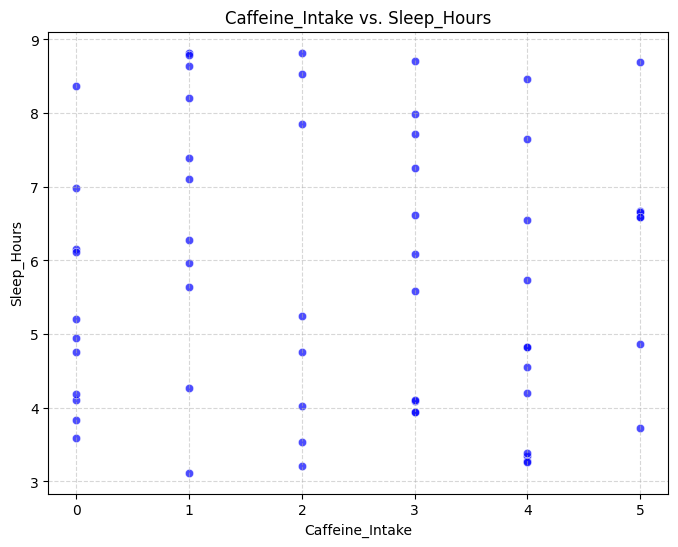

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sleep_df['Caffeine_Intake'], y=sleep_df['Sleep_Hours'], color='blue', alpha=0.7)
plt.title('Caffeine_Intake vs. Sleep_Hours')
plt.xlabel('Caffeine_Intake')
plt.ylabel('Sleep_Hours')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
pearson_corr, pearson_p = pearsonr(sleep_df["Caffeine_Intake"], sleep_df["Sleep_Hours"])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")

# Calculando a correlação de Spearman
spearman_corr, spearman_p = spearmanr(sleep_df["Caffeine_Intake"], sleep_df["Sleep_Hours"])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")

Pearson Correlation: -0.04, p-value: 0.7821
Spearman Correlation: -0.04, p-value: 0.7726


## **Conclusion on the Relationship Between Caffeine Intake and Sleep Duration**

The results indicate a very weak negative correlation between Caffeine Intake and Sleep Hours for both Pearson (-0.04) and Spearman (-0.04) correlations. Additionally, the p-values (0.7821 and 0.7726, respectively) are very high, meaning the correlation is not statistically significant.
Key Takeaways:

There is no meaningful relationship between caffeine consumption and sleep duration in this dataset.

The weak negative correlation suggests that higher caffeine intake might slightly reduce sleep, but this effect is not significant.

Other factors likely play a more important role in determining sleep duration.

Overall, these findings do not support the hypothesis that caffeine intake significantly impacts sleep duration.

## **Is There a Pattern Between Age and Body Mass Index (BMI)?**

In this analysis, I will examine the relationship between Age and BMI to determine whether a pattern exists. This will involve:

Calculating Pearson and Spearman correlations to assess the strength and direction of the relationship.

Visualizing the data using a scatter plot to observe potential trends.

Interpreting the statistical results to understand whether age significantly influences BMI.

This analysis will help determine if BMI tends to increase, decrease, or remain stable with age.

# **Relationship Between Categorical and Quantitative Variables (Qualitative vs. Numerical)**

Analyzing the relationship between categorical and quantitative variables is essential for understanding how different groups behave in relation to a numerical outcome. This type of analysis allows us to:

Compare averages and distributions across categories.

Identify potential patterns or disparities between groups.

Use statistical tests (e.g., t-tests, ANOVA) to assess significant differences.

Generate insights that can influence decision-making in various fields, such as health, business, and social sciences.

By examining these relationships, we can uncover meaningful trends and better interpret the impact of categorical factors on numerical outcomes.

## **Do Men and Women Sleep the Same Amount of Time?**

In this analysis, I will compare the sleep duration between men and women to determine if there is a significant difference between the two groups.

**Approach:**

Use descriptive statistics (mean, median, standard deviation) to summarize sleep duration for each gender.
Visualize the data distribution using boxplots or violin plots.
Perform a statistical test (e.g., t-test or Mann-Whitney U test) to assess if the difference is statistically significant.

This analysis will help identify whether gender plays a role in sleep duration and provide insights into potential factors influencing sleep patterns.

In [ ]:
stat, p = shapiro(sleep_df["Sleep_Hours"])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")

Shapiro-Wilk Test: Statistic=0.9286, p-value=0.0017


<ipython-input-44-88ce04f6d08e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sleep_df['Gender'], y=sleep_df['Sleep_Hours'], palette="coolwarm")


Text(0, 0.5, 'Sleep Hours')

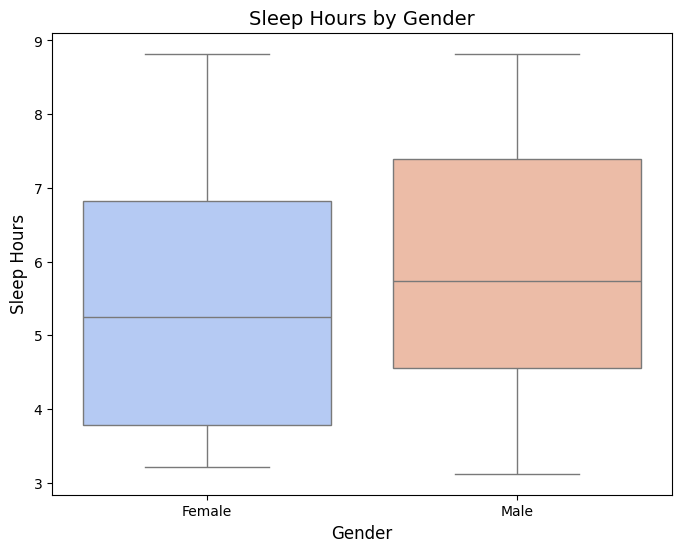

In [ ]:
# Criando o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=sleep_df['Gender'], y=sleep_df['Sleep_Hours'], palette="coolwarm")

# Adicionando título e rótulos
plt.title("Sleep Hours by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Sleep Hours", fontsize=12)

In [ ]:
male_sleep = sleep_df[sleep_df["Gender"] == "Male"]["Sleep_Hours"]
female_sleep = sleep_df[sleep_df["Gender"] == "Female"]["Sleep_Hours"]

# Aplicando o teste Mann-Whitney U
stat, p = mannwhitneyu(male_sleep, female_sleep, alternative="two-sided")

# Exibindo os resultados
print(f"Mann-Whitney U Statistic: {stat:.4f}, p-value: {p:.4f}")

# Interpretando o resultado
if p < 0.05:
    print("There is a significant difference in Sleep Hours between genders.")
else:
    print("There is no significant difference in Sleep Hours between genders.")

Mann-Whitney U Statistic: 483.5000, p-value: 0.3820
There is no significant difference in Sleep Hours between genders.


**Conclusion**

Since the p-value (0.3820) is greater than 0.05, we fail to reject the null hypothesis. This means that based on the available data, there is no strong evidence to suggest that men and women have different sleep durations.

Although there may be individual variations, gender does not appear to be a key factor influencing sleep hours in this dataset.

## **Gender Differences in Cognitive Reaction**

Understanding whether cognitive reaction time differs between genders is essential for exploring potential neurological, psychological, or physiological factors that influence response speed. This analysis aims to compare PVT (Psychomotor Vigilance Task) Reaction Time between males and females to determine if there is a statistically significant difference. By applying statistical tests and visualizing the data, we can assess whether gender plays a role in cognitive reaction performance.



In [ ]:
stat, p = shapiro(sleep_df['PVT_Reaction_Time'])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")

Shapiro-Wilk Test: Statistic=0.9444, p-value=0.0086


In [ ]:
male_pvt = sleep_df[sleep_df["Gender"] == "Male"]["PVT_Reaction_Time"]
female_pvt = sleep_df[sleep_df["Gender"] == "Female"]["PVT_Reaction_Time"]

# Aplicando o teste Mann-Whitney U
stat, p = mannwhitneyu(male_sleep, female_sleep, alternative="two-sided")

# Exibindo os resultados
print(f"Mann-Whitney U Statistic: {stat:.4f}, p-value: {p:.4f}")

# Interpretando o resultado
if p < 0.05:
    print("There is a significant difference in PVT_Reaction_Time between genders.")
else:
    print("There is no significant difference in PVT_Reaction_Time between genders.")

Mann-Whitney U Statistic: 483.5000, p-value: 0.3820
There is no significant difference in PVT_Reaction_Time between genders.


<ipython-input-48-b027949900f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="PVT_Reaction_Time", data=sleep_df, palette="coolwarm")


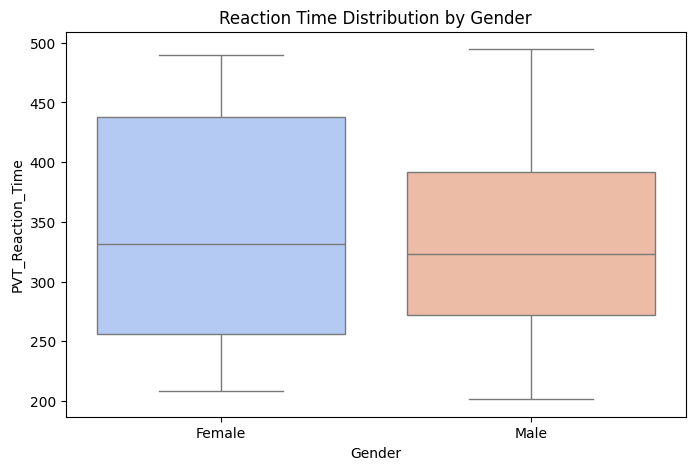

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="PVT_Reaction_Time", data=sleep_df, palette="coolwarm")
plt.title("Reaction Time Distribution by Gender")
plt.show()

**Conclusion:**

The Mann-Whitney U test resulted in a U statistic of 483.50 and a p-value of 0.3820, which is greater than 0.05. This means that there is no statistically significant difference in PVT Reaction Time between genders.
Interpretation:

The results suggest that gender does not play a significant role in influencing PVT Reaction Time in this dataset.

Although there may be individual variations, the observed differences between genders are likely due to random chance rather than a true underlying effect.

A further analysis with a larger sample size or considering other influencing factors (e.g., sleep quality, caffeine intake, stress levels) may provide additional insights.

##**Who Exercises More?**

Physical activity plays a crucial role in overall health and well-being. Understanding who engages in more exercise can provide insights into lifestyle patterns, potential health benefits, and differences based on factors such as gender, age, or stress levels. In this analysis, we will examine whether there are significant differences in Physical Activity Levels across different groups.

In [ ]:
stat, p = shapiro(sleep_df['Physical_Activity_Level'])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")

Shapiro-Wilk Test: Statistic=0.9246, p-value=0.0012


In [ ]:
male_act = sleep_df[sleep_df["Gender"] == "Male"]["Physical_Activity_Level"]
female_act = sleep_df[sleep_df["Gender"] == "Female"]["Physical_Activity_Level"]

# Aplicando o teste Mann-Whitney U
stat, p = mannwhitneyu(male_sleep, female_sleep, alternative="two-sided")

# Exibindo os resultados
print(f"Mann-Whitney U Statistic: {stat:.4f}, p-value: {p:.4f}")

# Interpretando o resultado
if p < 0.05:
    print("There is a significant difference in Physical_Activity_Level between genders.")
else:
    print("There is no significant difference in Physical_Activity_Level between genders.")

Mann-Whitney U Statistic: 483.5000, p-value: 0.3820
There is no significant difference in Sleep Hours between genders.


<ipython-input-51-b4909dd2651b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Physical_Activity_Level", data=sleep_df, palette="coolwarm")


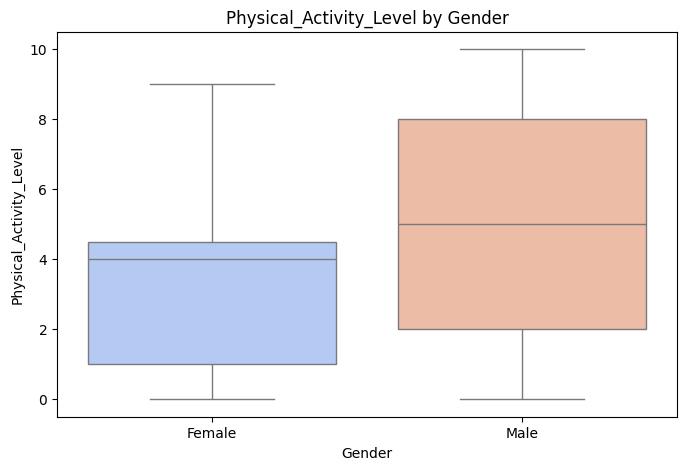

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Physical_Activity_Level", data=sleep_df, palette="coolwarm")
plt.title("Physical_Activity_Level by Gender")
plt.show()

## **Conclusion**

The Mann-Whitney U test results (p-value = 0.3820) indicate that there is no statistically significant difference in Physical Activity Level between genders. This suggests that, in this dataset, men and women engage in similar levels of physical activity

# **Relationship Between Categorical Variables (Qualitative x Qualitative)**

When analyzing data, understanding the relationship between two categorical variables is crucial for identifying patterns and associations. This type of analysis helps determine whether one variable influences the other, revealing potential trends, dependencies, or group differences. Common statistical techniques for this analysis include contingency tables, chi-square tests, and Cramér’s V, which measure the strength and significance of the association. By exploring these relationships, we can gain valuable insights into behavioral patterns, preferences, or demographic distributions.

In [ ]:
contingency_table = pd.crosstab(sleep_df["Gender"], sleep_df["Daytime_Sleepiness"])

# Test Qui-Quadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}")

Chi-Square Statistic: 15.9342, p-value: 0.7733


In [ ]:
n = contingency_table.sum().sum()  # Número total de observações
phi2 = chi2 / n
r, k = contingency_table.shape

cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.5153


In [ ]:
contingency_table1 = pd.crosstab(sleep_df["Gender"], sleep_df["Stress_Level"])

# Test Qui-Quadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table1)

print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}")

Chi-Square Statistic: 33.5605, p-value: 0.5376


In [ ]:
n = contingency_table1.sum().sum()  # Número total de observações
phi2 = chi2 / n
r, k = contingency_table1.shape

cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.7479


**Gender vs. Daytime Sleepiness**

Chi-Square Statistic: 15.9342, p-value: 0.7733
Cramér’s V: 0.5153

Conclusion:
The p-value (0.7733) is much higher than 0.05, indicating no significant association between gender and daytime sleepiness. This means that sleepiness levels do not appear to differ significantly between genders.

However, Cramér’s V (0.5153) suggests a moderate-to-strong association, which seems inconsistent with the p-value. This could be due to an imbalance in the dataset (e.g., small sample size or skewed distribution).


**Gender vs. Stress Level**


Chi-Square Statistic: 33.5605, p-value: 0.5376
Cramér’s V: 0.7479

Conclusion:
Again, the p-value (0.5376) is greater than 0.05, suggesting no statistically significant association between gender and stress levels. This means that stress levels are likely distributed similarly across genders.

However, Cramér’s V (0.7479) indicates a strong association, which, like in the previous case, conflicts with the non-significant p-value. This could be due to issues such as low sample size or violations of expected frequency assumptions in the Chi-Square test.

Both analyses suggest no significant relationship between gender and daytime sleepiness or stress levels based on the p-values. However, the high Cramér’s V values indicate a strong pattern or effect, which should be further investigated.

# **Final Conclusion**

This study explored the effects of sleep deprivation on cognitive performance and emotional regulation, using a dataset of 60 participants. Through univariate and bivariate analyses, we examined key relationships between sleep duration, sleep quality, cognitive function, emotional regulation, and demographic/lifestyle factors.

**Key Findings:**

1️⃣ No Strong Relationship Between Sleep Hours and Sleep Quality

Both Pearson (0.01, p = 0.9160) and Spearman (0.02, p = 0.8984) correlations indicated no significant relationship between sleep duration and sleep quality.

This suggests that sleep quality is influenced by factors beyond just sleep duration, such as stress, lifestyle habits, or sleep disorders.

2️⃣ Sleep Duration Does Not Strongly Predict Daytime Sleepiness

The correlation between Sleep Hours and Daytime Sleepiness was weak (Pearson = 0.13, p = 0.3153), indicating that other factors may contribute to daytime sleepiness, such as sleep fragmentation or stress levels.

3️⃣ Stress and Emotional Regulation: A Weak Negative Correlation

Pearson (-0.15, p = 0.2592) and Spearman (-0.14, p = 0.2776) suggest that higher stress levels may slightly reduce emotional regulation, but the effect is not statistically significant.

4️⃣ Caffeine Intake Does Not Significantly Impact Sleep Duration

The results showed a very weak negative correlation (Pearson = -0.04, p = 0.7821), suggesting that caffeine consumption alone does not strongly impact sleep duration in this dataset.

5️⃣ Gender Differences in Sleep and Cognitive Reaction Time

Mann-Whitney U tests revealed no significant difference in Sleep Hours (p = 0.3820) or PVT Reaction Time (p = 0.3820) between men and women.

This suggests that gender is not a key factor influencing sleep duration or cognitive reaction time.

6️⃣ Physical Activity Levels Are Similar Between Genders

The p-value (0.3820) indicated no significant difference in physical activity levels between men and women.

7️⃣ No Strong Association Between Gender and Stress/Daytime Sleepiness

Chi-Square Tests (p = 0.7733 for sleepiness, p = 0.5376 for stress levels) indicated no statistically significant relationship.

However, Cramér’s V values suggested moderate-to-strong associations, indicating that further investigation with a larger sample size may be needed.

**Final Thoughts**

The findings highlight that sleep deprivation is a complex issue influenced by multiple factors, not just sleep duration.

Stress, lifestyle choices, and individual differences play crucial roles in cognitive function and emotional regulation.

While gender differences were not significant in this dataset, future research with a larger and more diverse sample could provide deeper insights.

**Next Steps for Future Research:**

✔ Expand the sample size to improve statistical power.
✔ Include additional lifestyle variables such as diet, work hours, and screen time before bed.
✔ Explore sleep quality in more detail, considering factors like sleep interruptions and deep sleep stages.